# Project 2 Assignment

## Assignment Overview & Instructions

The objective of Project 2 is to extract time series features for human activity
monitoring.

### Dataset
The following [link](https://www.uni-mannheim.de/dws/research/projects/activity-recognition/#dataset_realworld) provides human activity data for 15 subjects. Click on each subject to
access the time series data.   
For this project consider accelerometer data for all the 15
subjects for walking, running, climbing up and climbing down for chest sensor only.

### Task 1: Load the data

You might find downloading the dataset from [here](https://drive.google.com/drive/folders/1JneWV9NL1v2R8LpiTNKw2oqTgd3o2Sgx) more convenient.

In [1]:
# The goal for task one is to upload all 60 CSV files (15 subjects x 4 activities walking, running, climbingup and climbingdown for chest sensor only)
# then combine them into one file
# the dataset for each subject contains columns of id, attr_time, attr_x, attr_y, attr_z 
# each subject 1-15 has data on 4 activities such as walking, running, climbingup, climbingdown all for chest sensor only 

import numpy as np                                           # imported libraries for use
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import ordpy
from time import time
                                                           
csv_files = sorted(glob.glob("s*_acc_*_chest.csv"))             # glob.glob() function used to find all csvs file names that match s*_acc_*_chest.csv
                                                            # For example like s3_acc_climbingup_climbingup_chest and so on for the rest of the csv files

                                                            # -------------------------------------------------------------------------------------------


def parse_meta(filepath):                                      # lets define a function parse_meta to return the subject and activity based 
                                                               # on the CSV file name since the file states the subject individual number 
                                                               # and what activity is being done

    file_name = filepath.split("/")[-1].replace(".csv", "")    # filepath.split("/") splits the file name into parts then [-1] will be the last bit of the list
                                                               # then [-1] will take the last bit of the list (for example s3_acc_climbingup_climbingup_chest.csv)
                                                               # replace(".csv", "") gets rid of the .csv part and replaces it with a blank
    
    separate_file_words = file_name.split("_")                 # .split("_") will remove the underscore from the file_name s3_acc_climbingup_climbingup_chest
                                                               # results in ["s3", "acc", "climbingup", "climbingup", "chest"]
   
    subject = int(separate_file_words[0].replace("s", ""))     # take index 0 which is s3, and replaces the s with a blank so now its just 3 then int converts string back to an integer
    activity = separate_file_words[2].lower()                  # take index 2 which is climbingup and lowercases it

    return subject, activity                                   # returns subject and activity values for example as 3, climbingup

                                                               # ------------------------------------------------------------------------------------------------------------------------

dfs = []                                                       # storage for 60 clean csv files 

for f in csv_files:                                            # for loop that goes through all files
    df = pd.read_csv(f)                                        # then reads csv files to dataframes 

    
    df.columns = [c.strip().lower() for c in df.columns]       # clean columns by removing spaces and lowercase the columns in the csv files 
                                                               # using list comprehension to loop through all files 
    
    rename_columns = {                                         # create dictionary to rename colunmns for clarity 
        "attr_time": "time",
        "attr_x": "x",
        "attr_y": "y",
        "attr_z": "z"}
    
    df.rename(columns=rename_columns, inplace=True)            #rename columns for clarity 

    
    if "id" in df.columns:                                     # remove Id column because info not needed (we will have an index already)
        df.drop(columns="id", inplace=True)
   
    
    expected = {"time", "x", "y", "z"}                                        # check columns to make sure no column is missing in all files
    if not expected.issubset(df.columns):                                     # if columns missing time x y z in all 60 files then will trigger valueerror
        raise ValueError(f"check column in file {f}: {df.columns.tolist()}")  # df.columns.tolist shows the columns within that particular file that an error showed up in

    # Add metadata columns
    subject, activity = parse_meta(f)                        # call our parse_meta() function to return subject, and activity for file
    df["subject"] = subject                                   # columns subject and activity have been added
    df["activity"] = activity

    dfs.append(df)                                            # after each loop, data gets added to the data list
                                                              # -----------------------------------------------------------------------------------------

combined_df = pd.concat(dfs, ignore_index=True)               # combines all files together and reset index in massive dataframe 

combined_df.head(10)                                          # all files combined in combined_df                           


,time,x,y,z,subject,activity
0,1436802576021,0.352546,9.455899,-2.029086,10,climbingdown
1,1436802576042,0.370503,9.336189,-1.991377,10,climbingdown
2,1436802576061,0.452504,9.351752,-1.887828,10,climbingdown
3,1436802576083,0.445920,9.403826,-1.862090,10,climbingdown
4,1436802576102,0.329801,9.434352,-1.851317,10,climbingdown
5,1436802576122,0.305261,9.478046,-1.890821,10,climbingdown
6,1436802576140,0.320224,9.430161,-2.006940,10,climbingdown
7,1436802576171,0.414795,9.497798,-1.932719,10,climbingdown
8,1436802576189,0.435146,9.578004,-1.903390,10,climbingdown
9,1436802576204,0.419584,9.585785,-1.936909,10,climbingdown


In [2]:
# check total files that were uploaded, should be 60 files total
print(len(csv_files))

# check total rows and columns of combined_df
print(combined_df.shape)

# check data types of combined_df
print(combined_df.dtypes)

60
(1752359, 6)
time          int64
x           float64
y           float64
z           float64
subject       int64
activity     object
dtype: object


In [3]:
# confirm total subjects the activities in combined_df
print(sorted(combined_df['subject'].unique()))
print(sorted(combined_df['activity'].unique()))

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15)]
['climbingdown', 'climbingup', 'running', 'walking']


In [4]:
# wanted to double check the number of rows for one of the subjects
#lets check subject1 and total rows match 120687 vs 120683 with neglible % error ~ 0.003%
subject1_df = combined_df[combined_df['subject'] == 1]
subject1_df

,time,x,y,z,subject,activity
663721,1435996968010,5.616797,8.064270,0.878073,1,climbingdown
663722,1435996968032,5.589264,8.054693,0.869095,1,climbingdown
663723,1435996968052,5.580884,8.060080,0.908001,1,climbingdown
663724,1435996968073,5.588067,8.033744,0.884657,1,climbingdown
663725,1435996968093,5.583877,8.060678,0.875679,1,climbingdown
...,...,...,...,...,...,...
784579,1435993798919,-2.229600,9.327810,1.222838,1,walking
784580,1435993798939,-2.273893,9.317635,1.176750,1,walking
784581,1435993798956,-2.308609,9.300277,1.151012,1,walking
784582,1435993798978,-2.316989,9.251794,1.148020,1,walking


### Task 2: Feature Extraction
Compute permutation entropy and complexity across all parameter combinations:
- Dimensions: 3, 4, 5, 6
- Delays: 1, 2, 3
- Signal lengths: 1024, 2048, 4096
- All three axes (x, y, z)

**Sample output table**

|   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|
| Subject  | Accelerometer axis   | Signal length  | Dimension  | Delay  | Permutation entropy  | Complexity  | Activity  |
| 1 to 15  | x or y or z  | 1024 or 2048 or 4096  | 3 or 4 or 5 or 6  | 1 or 2 or 3  |   |   | Walking or running or climbing up or climbing down  |

This table/dataframe is expected to have 6480 rows.

In [5]:
# Goal is to get the Permutation Entropy (H) and Statistical Complexity (C) for every combination based on these conditions where: 
# dimension is either 3,4,5,6 
# delays is either 1,2,3 
# Signal length (L) is either 1024,2048,4096 
# axis is either x,y,z 
# subjects 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
# chest accelerometer data based on activies of either walking,running,climbingup,climbingdown 

# The expected output stated above should be 6,480 rows (15 subjects × 4 activities × 3 axes × 4 dimensions × 3 delays × 3 signal lengths)
# All combinations based on (15 subjects × 4 activities × 3 axes × 4 dimensions × 3 delays × 3 signal lengths)

In [6]:
# define function to get single accelerometer signal, get_series parameters to get specific subject, activity, axis
# get rows by filtering subject, activity, then [axis] takes either column x,y,z
# drop any NaN then convert series to array (for H later)
# if the select_data is greater than 0 then return it if not then return None

def get_series(df, subject, activity, axis):                                                                
    select_data = df[(df["subject"] == subject) & (df["activity"] == activity)][axis].dropna().to_numpy()   
    return select_data if len(select_data) > 0 else None                                                                                   
                                                                                                            
#--------------------------------------------------------------------------------------------------------

# define function to get normalized Permutation Entropy (H) and Statistical Complexity (C)
    # low H (close to 0), low randomness, predictable 
    # High H (clsoe to 1), high randomness, unpredictable
    # Low C (close to 0), either state of perfect order or max randominess/disorder
    # High C (close to 1) structured 

# D=3 and tau=1 default if no D and tau called on 
# if signal_array is missing or is <= D*tau then returns None,None (for both H,C)
# if signal_array is present and is greater than D*tau  then returns (H,C) 

def entropy_complexity(signal_array, D=3, tau=1):
    if signal_array is None or len(signal_array) <= D * tau:
        return None, None
    return ordpy.complexity_entropy(signal_array, D, tau) 

In [7]:
# my parameters
dimensions = [3, 4, 5, 6]        
delays     = [1, 2, 3]           
lengths    = [1024, 2048, 4096] 
axes       = ["x", "y", "z"]     


subjects   = sorted(combined_df["subject"].unique())   # 15 subjects 
activities = sorted(combined_df["activity"].unique())  # 4 activities 

# empty list for storing H,C values for the different parameter combinations 
HC_results = [] 

# for loops to get all H, C combinations
for subject in subjects:                  # iterate over each subject
    for activity in activities:           # iterate over each activity based on the subject 
        series_map = {axis: get_series(combined_df, subject, activity, axis) for axis in axes} #gets array signals for the 3 axes 
        for axis, series in series_map.items(): #iterate over each axes 
            if series is None:                  # will bypass axes if does not find any data (blanks, NaNs)
                continue
            for length in lengths:              # iterate over each length 
                if len(series) < length:        # if series is less than the current tested length then skip
                    continue
                seg = series[:length]           # takes first length
                for dimension in dimensions:    # iterate over each dimension
                    for delay in delays:        # iterate over each delay
                        H, C = entropy_complexity(seg, D=dimension, tau=delay) # calculate the H, C based on the signal array combination
                        if (H is None) or (C is None):
                            continue
                        HC_results.append({     # results for the follow columns 
                            "subject": subject,
                            "activity": activity,
                            "axis": axis,
                            "length": length,
                            "dimension": dimension,
                            "delay": delay,
                            "H": H,
                            "C": C})

# results combined in one dataframe
results_df = (
    pd.DataFrame(HC_results)
      .sort_values(["subject","activity","axis","length","dimension","delay"],
                   ignore_index=True))

# results should be 6480 rows based on all combinations of (15 subjects × 4 activities × 3 axes × 4 dimensions × 3 delays × 3 signal lengths)
print(len(results_df))
results_df.head()


6480


,subject,activity,axis,length,dimension,delay,H,C
0,1,climbingdown,x,1024,3,1,0.865585,0.112619
1,1,climbingdown,x,1024,3,2,0.235729,0.229605
2,1,climbingdown,x,1024,3,3,0.121148,0.121135
3,1,climbingdown,x,1024,4,1,0.806945,0.188260
4,1,climbingdown,x,1024,4,2,0.241830,0.241074


### Task 3: Focus Your Analysis

Now select one particular subject of your choice (e.g 3), a particular attribute of your choice (e.g x) and a particular Signal length (e.g 2048) and filter the data for these specifics. You are only requited to filter the required data here. In the tasks 4 and 5, you will focus your analysis on this partcular subject for the specified accelerometer axis and signal length.



In [8]:
# My Chosen Subject, axis, and length
print("filtered for subject 9, axis = x, length = 2048")
subject_9_Summary = results_df.query("subject == 9 and axis == 'x' and length == 2048")

display(subject_9_Summary.head(10))

filtered for subject 9, axis = x, length = 2048


,subject,activity,axis,length,dimension,delay,H,C
3468,9,climbingdown,x,2048,3,1,0.868612,0.110377
3469,9,climbingdown,x,2048,3,2,0.236553,0.230399
3470,9,climbingdown,x,2048,3,3,0.121572,0.121558
3471,9,climbingdown,x,2048,4,1,0.808633,0.190443
3472,9,climbingdown,x,2048,4,2,0.242336,0.241580
3473,9,climbingdown,x,2048,4,3,0.128576,0.128576
3474,9,climbingdown,x,2048,5,1,0.770028,0.276611
3475,9,climbingdown,x,2048,5,2,0.244068,0.244015
3476,9,climbingdown,x,2048,5,3,0.132136,0.132136
3477,9,climbingdown,x,2048,6,1,0.732918,0.385785


### Task 4: Waling vs Running

Use scatter plots to identify the optimal dimension and delay that best separate walking from running. Since you focused on a single dimension, a single subject and a single dimension, you will get 12 walking, running pairs for 4 dimensions and 3 delays, this should give rise to 12 panels, each showing a scatterplot.

After you have made the scatter plots, identify the optimum dimension and delay that provide the best separation between walking and running. Reason why this is your choice.

Text(0.5, 1.02, 'walking vs running: subject 9_axis x_length 2048')

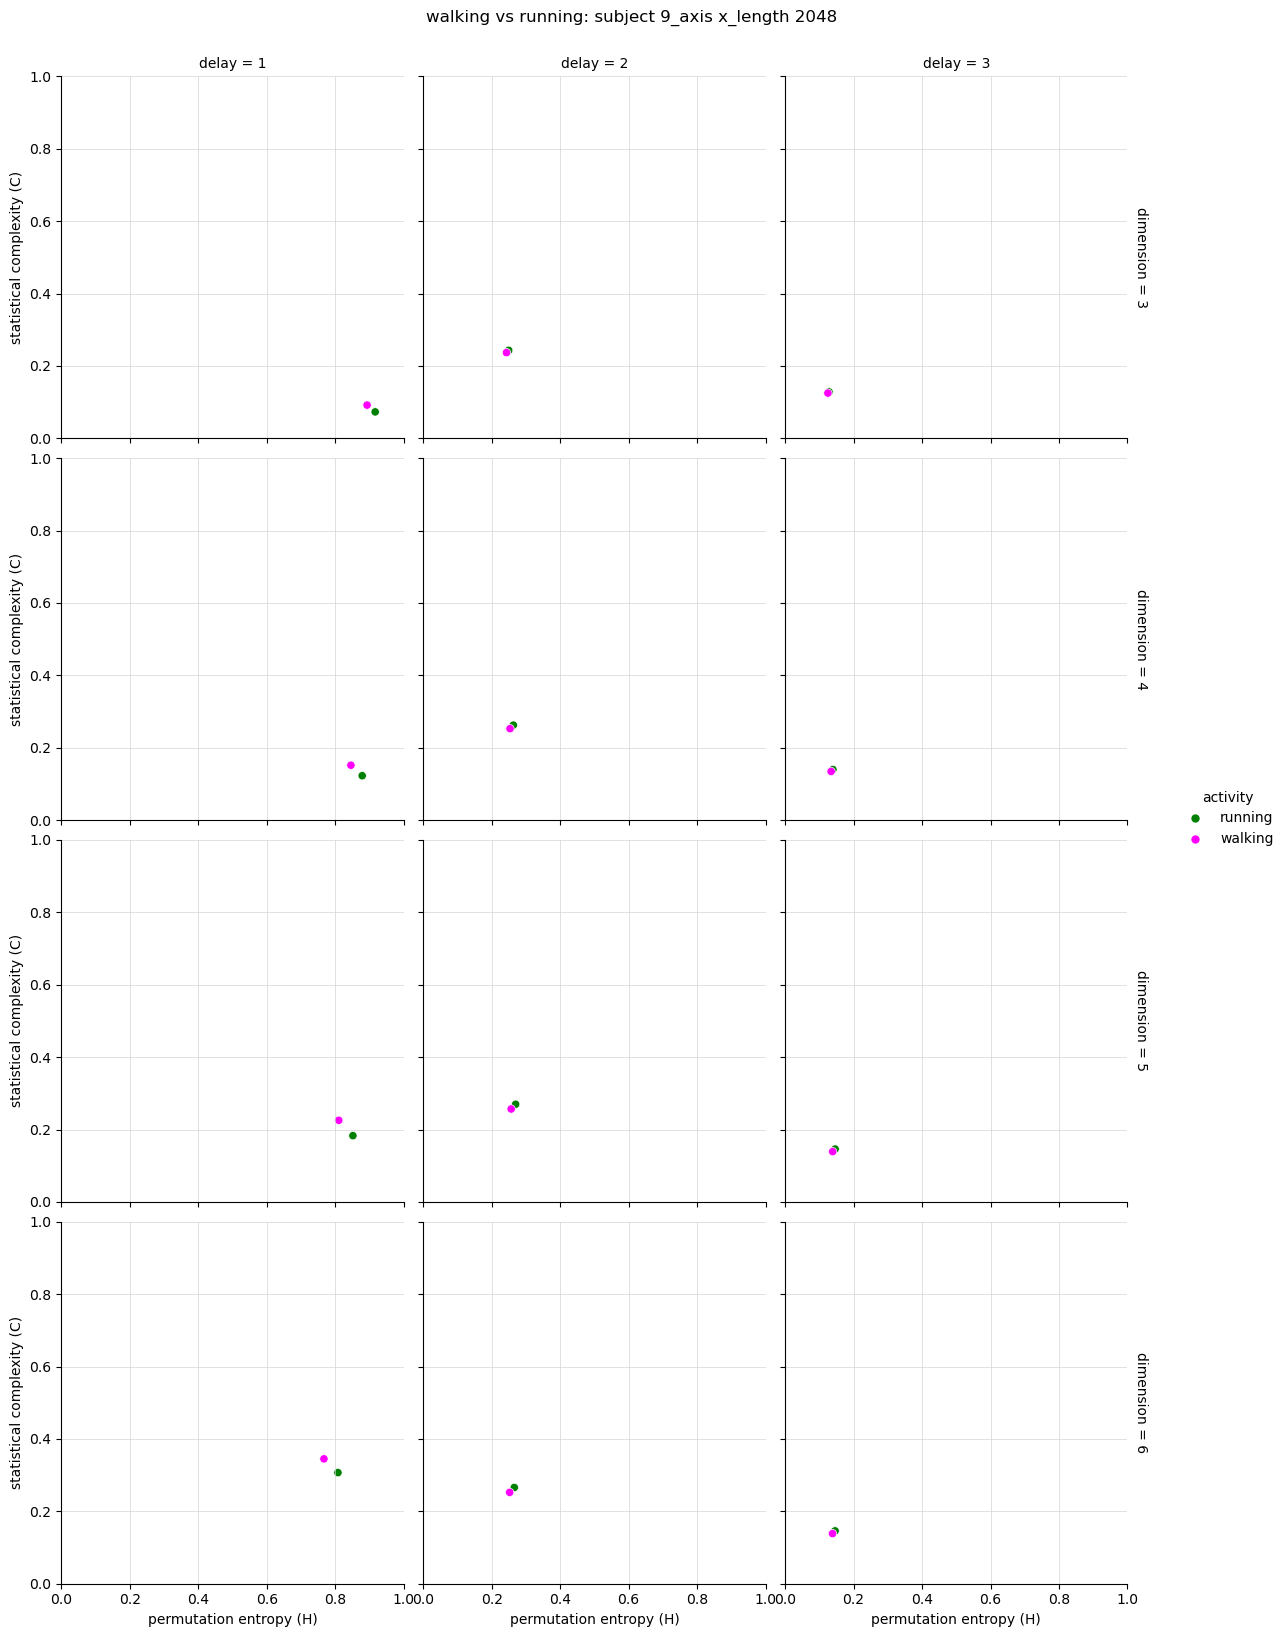

In [9]:
# Used seaborn to plot subject_9_Summary (subject = 9, axis = x, length = 2048)
# filter only for activities walking and running 
walking_running = subject_9_Summary.query("activity in ['walking', 'running']")

# Scatter plot
# H on x axis, C on y axis
# activities (walking palette magenta and running palette green), 
# column for delays and row for dimensions 
# height and aspect how high and wide
g = sns.relplot(data=walking_running, x="H", y="C", hue="activity", col="delay", row="dimension", kind="scatter", height=4, aspect=1, 
                palette={"walking": "magenta", "running": "green"},
                facet_kws=dict(margin_titles=True, sharex=True, sharey=True))  # shows column and row titles and share the same x and y axis scale

# limits for consistent scale from 0-1 for all the subplots and label them
g.set(xlim=(0,1), ylim=(0,1))
g.set_axis_labels("permutation entropy (H)", "statistical complexity (C)")

# lets add grids in the back so easier to see 
# loops through all the subplots
for ax in g.axes.flat:
    ax.grid(True, which='both', color='lightgray', linestyle='-', linewidth=.7, alpha=.7)
    
# heading title
g.figure.suptitle("walking vs running: subject 9_axis x_length 2048", y=1.02)

#### <u>Response<u>

Based on the scatter plots the optimum dimension is 5 and delay is 1 for best separation between the activities of walking and running based on (H, C) CECP (for subject 9, axis x, length 2048). When delay increases the two points (activities) start to move closer and closer together showing less sensitivity to short term patterns of the signals. Moreover, increasing the dimension shows better separation up to when the dimension is 5 and as it increases the separation between the points starts to plateau and barely changes (H and C values are not changing much after this point) so dimension 5 is where the main data complexity is captured. 

### Task 5: Climbing Up vs. Climbing Down

Use scatter plots similar to task 4 to identify the optimal dimension and delay that best separate climbing up from climbing down.


Text(0.5, 1.02, 'climbingup vs climbingdown: subject 9_axis x_length 2048')

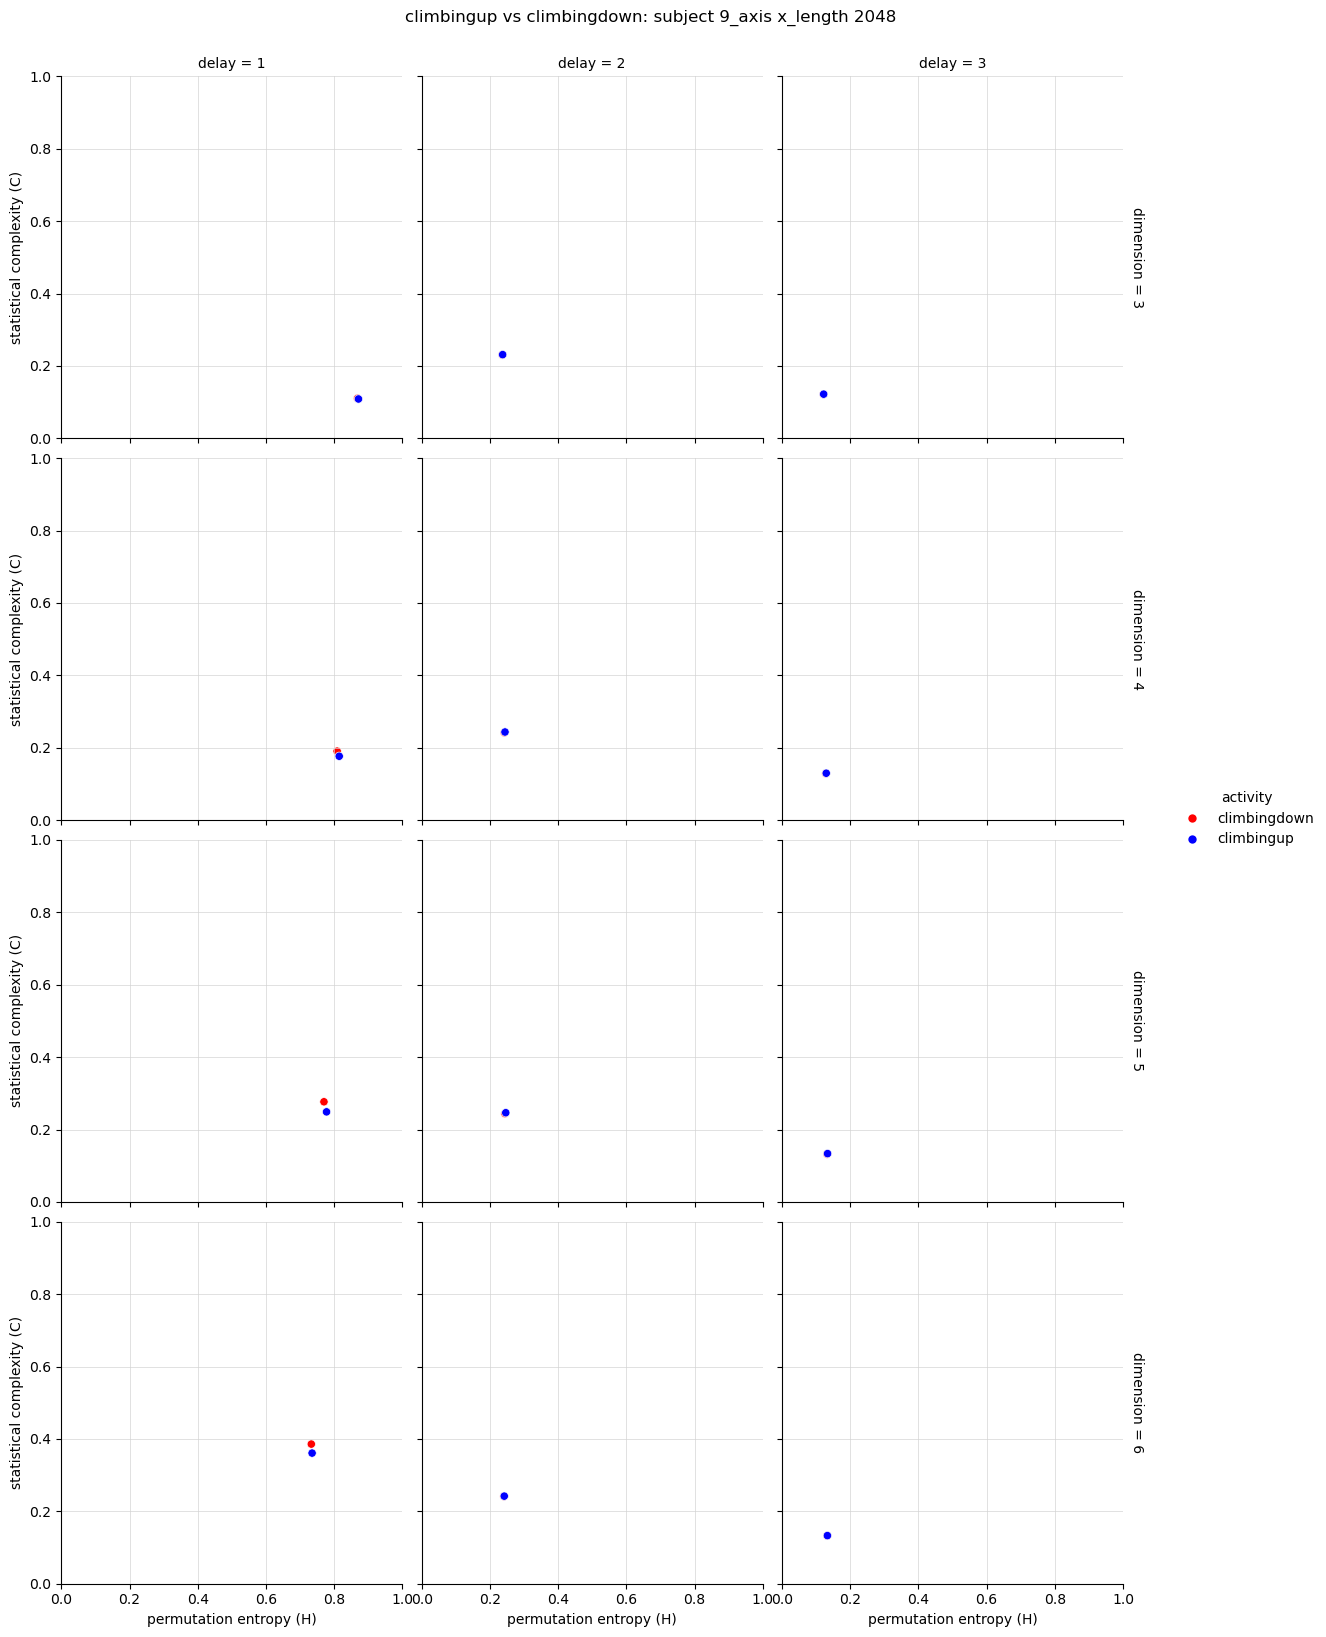

In [10]:
# Used seaborn to plot subject_9_Summary (subject = 9, axis = x, length = 2048)
# filter only for activities climbingup and climbingdown 
climbing_up_down = subject_9_Summary.query("activity in ['climbingup', 'climbingdown']")

# Scatter plot
# H on x axis, C on y axis
# activities (climbingup palette blue and climbingdown palette red), 
# column for delays and row for dimensions 
# height and aspect how high and wide
g = sns.relplot(data=climbing_up_down, x="H", y="C", hue="activity", col="delay", row="dimension", kind="scatter", height=4, aspect=1, 
                palette={"climbingup": "blue", "climbingdown": "red"},
                facet_kws=dict(margin_titles=True, sharex=True, sharey=True))  # shows column and row titles and share the same x and y axis scale

# limits for consistent scale from 0-1 for all the subplots and label them
g.set(xlim=(0,1), ylim=(0,1))
g.set_axis_labels("permutation entropy (H)", "statistical complexity (C)")

# lets add grids in the back so easier to see 
# loops through all the subplots
for ax in g.axes.flat:
    ax.grid(True, which='both', color='lightgray', linestyle='-', linewidth=.7, alpha=.7)
    
# title
g.figure.suptitle("climbingup vs climbingdown: subject 9_axis x_length 2048", y=1.02)

#### <u>Response<u>

Similar to Task 4, based on the scatter plots the optimum dimension is 5 and delay is 1 is also the best separation between the activities of climbingup and climbingdown based on (H, C) CECP (for subject 9, axis x, length 2048). When delay increases the two points (activities) start to move closer and closer together showing less sensitivity to short term patterns of the signals. Moreover, increasing the dimension shows better separation up to when the dimension is 5 and as it increases the separation between the points starts to plateau and barely changes (H and C values are not changing much after this point) so dimension 5 is where the main data complexity is captured.

## Submitting your Project

Once you've completed your project, it's time to submit your work for grading.   
This week, you will submit your code file `Project 2.ipynb` for review.  

In order to submit your work, please follow the steps below:
1. Verify you've saved your work using the `Save` button within the Jupyter Notebook 
2. Download this notebook using the `File` -> `Download As` -> Choose the `Notebook (.ipynb)` format.
3. Access the following Step 2: Submit Project 2 item.
4. Complete all prompted fields, and upload your Jupyter Notebook file (Project 2.ipynb) in the indicated field.
5. Submit your notebook to "Step 2: Submit Project 2" by the deadline indicated within your course view for the Project 2 Assignment item.

## Grading Rubric

1. Task 1 = 5 points


2. Task 2 = 35 points


3. Task 3 = 10 points


4. Task 4 = 20 points


5. Task 5 = 20 points


6. 10 points for coding consistencies (follow PeP 8 style guide for coding)

    a. Proper commenting
    
    b. Proper variable names
    
    c. Inclusion of texts in notebook to explain all the steps
    
    d. Include formulas for permutation entropy and complexity in your notebook 

    e. Inclusion of all outputs of your code

Congratulations on completing the Project 2 Assignment!